In [1]:
## import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
exp_df=pd.read_csv("/Users/narayan/Projects/Laura/ES_RNAseq/Kallisto/exp_hvg_BNP_ES_RNAseq_kallisto.tsv", sep="\t")
print exp_df.head()
exp_df.shape

                    B6_25_01215  B6_25_01216  B6_25_01217  B6_26_01218  \
ENSMUSG00000000001   112.535066   140.261493   121.564220    77.004043   
ENSMUSG00000000028    55.377985    45.774339    58.876301    30.884547   
ENSMUSG00000000031   360.837161   268.873986   351.202901   257.288049   
ENSMUSG00000000037    68.829189    65.403145    57.885148    42.184776   
ENSMUSG00000000049   570.553923   547.945950   359.125493   384.411497   

                    B6_26_01219  B6_26_01220  B6_42_01884  B6_42_01885  \
ENSMUSG00000000001    93.834246    58.724304    66.404632   112.296180   
ENSMUSG00000000028    27.352298    25.432281    28.632267    22.559383   
ENSMUSG00000000031   454.737678   205.822051   235.977154   282.103623   
ENSMUSG00000000037    46.089276    29.380832    37.787682    35.457915   
ENSMUSG00000000049   430.484816   533.497426   335.529465   483.809303   

                    B6_42_01886  NOD_JAG012_01224       ...         \
ENSMUSG00000000001    94.305127         

(7377, 27)

In [3]:
read_counts_df=pd.DataFrame(exp_df.sum(axis=0))
read_counts_df.head()
list(read_counts_df.index)
read_counts_df.columns =['read_counts']
read_counts_df.head()

,read_counts
B6_25_01215,922865.941265
B6_25_01216,930475.254480
B6_25_01217,846333.430633
B6_26_01218,692400.139611
B6_26_01219,880113.762287


In [4]:
# add a new 'Sample ID' column
read_counts_df['SampleID'] =list(read_counts_df.index)
# add a new 'Strain' column
read_counts_df['Strain'] = [i.split("_")[0] for i in list(read_counts_df.index)]
print read_counts_df.head()
color_dict={'B6':'blue',
            'NOD':'green',
             'PWD':'red'}
read_counts_df['Color']=[color_dict[s] for s in read_counts_df['Strain']]
print read_counts_df.head()   

               read_counts     SampleID Strain
B6_25_01215  922865.941265  B6_25_01215     B6
B6_25_01216  930475.254480  B6_25_01216     B6
B6_25_01217  846333.430633  B6_25_01217     B6
B6_26_01218  692400.139611  B6_26_01218     B6
B6_26_01219  880113.762287  B6_26_01219     B6
               read_counts     SampleID Strain Color
B6_25_01215  922865.941265  B6_25_01215     B6  blue
B6_25_01216  930475.254480  B6_25_01216     B6  blue
B6_25_01217  846333.430633  B6_25_01217     B6  blue
B6_26_01218  692400.139611  B6_26_01218     B6  blue
B6_26_01219  880113.762287  B6_26_01219     B6  blue


(7377, 27)
(7377, 7377) (27,) (27, 27)


/Users/narayan/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


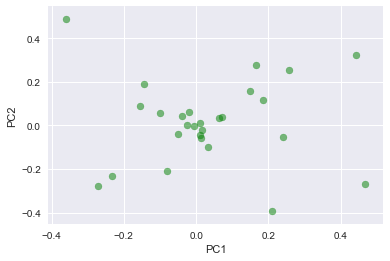

In [5]:
exp_hvg_log2cnts=np.log2(exp_df+1)
exp_hvg_log2cnts.shape
e_mat = (exp_hvg_log2cnts - np.mean(exp_hvg_log2cnts))
e_mat.shape
X=e_mat.values
print X.shape
U, s, V = np.linalg.svd(X, full_matrices=True)
print U.shape,s.shape,V.shape
x=V[:,0]
y=V[:,1]
plt.scatter(x, y, c='g', alpha=0.5,marker='o')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc=2)
plt.show()


(7377, 27)
(7377, 7377) (27,) (27, 27)
27


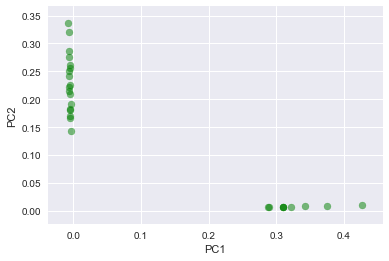

In [102]:
e_mat = (exp_df - np.mean(exp_df))
e_mat.shape
X=e_mat.values
print X.shape
U, s, V = np.linalg.svd(X, full_matrices=True)
print U.shape,s.shape,V.shape
x=V[0,:]
y=V[1,:]
print(len(x))
plt.scatter(x, y, c='g', alpha=0.5,marker='o')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc=2)
plt.show()


In [103]:
#first we need to map colors on labels
dfcolor = pd.DataFrame([['B6','red'],['NOD','green'],['PWD','blue']],columns=['Strain','Color'])
#mergeddf = pd.merge(df,dßfcolor)
dfcolor
np.transpose(exp_df).head
#read_counts_df.head()

<bound method DataFrame.head of                   ENSMUSG00000000001  ENSMUSG00000000028  ENSMUSG00000000031  \
B6_25_01215               112.535066           55.377985          360.837161   
B6_25_01216               140.261493           45.774339          268.873986   
B6_25_01217               121.564220           58.876301          351.202901   
B6_26_01218                77.004043           30.884547          257.288049   
B6_26_01219                93.834246           27.352298          454.737678   
B6_26_01220                58.724304           25.432281          205.822051   
B6_42_01884                66.404632           28.632267          235.977154   
B6_42_01885               112.296180           22.559383          282.103623   
B6_42_01886                94.305127           35.640876          221.285722   
NOD_JAG012_01224            0.000000            2.999686           13.993558   
NOD_JAG012_01225            0.000000            2.083834            9.084127   
NOD_JAG0

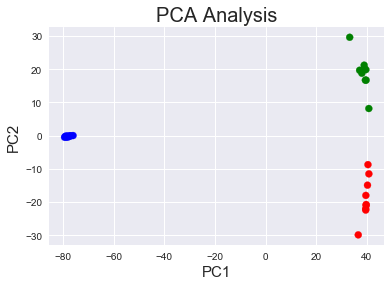

In [104]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
#X = scale(exp_df)
#print np.transpose(exp_df).head
pca = PCA(n_components=2)
#exp_std = StandardScaler().fit(exp_df).transform(exp_df)
exp_std = StandardScaler().fit_transform(exp_df)
exp_std.shape
pca_std = PCA(n_components=2).fit(np.transpose(exp_std))
pc_std = pca_std.transform(np.transpose(exp_std))
len(pc_std[:,0])
plt.scatter(x=pc_std[:,0],y=pc_std[:,1],c=read_counts_df['Color'])
plt.title('PCA Analysis', fontsize=20)
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
plt.grid(True)
plt.show()

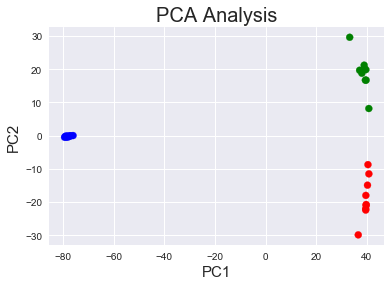

array([-78.19982247, -78.92074373, -79.46013698, -79.10278269,
       -77.19221373, -76.10507326, -77.24012202, -78.08962551,
       -78.5878233 ,  33.25967765,  38.07497249,  37.18442509,
        39.75612724,  39.45594596,  39.02842642,  38.98146475,
        40.82655059,  39.6699392 ,  40.85025996,  40.30310761,
        39.6017256 ,  39.65134204,  40.48229125,  39.57987144,
        39.78642655,  36.64456681,  39.76122304])

In [123]:
from sklearn.preprocessing import scale
#pca = PCA(n_components=2)
#exp_std = StandardScaler().fit(exp_df).transform(exp_df)
exp_df = scale(exp_df)
#exp_scaled.shape
pca_std = PCA(n_components=2).fit(np.transpose(exp_df))
pc_std = pca_std.transform(np.transpose(exp_df))
len(pc_std[:,0])
plt.scatter(x=pc_std[:,0],y=pc_std[:,1],c=read_counts_df['Color'])
plt.title('PCA Analysis', fontsize=20)
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
plt.grid(True)
plt.show()
pc_std[:,0]

In [49]:

pca.fit_transform(exp_std)
#pca.fit(np.transpose(exp_df)).transform(np.transpose(exp_df))
#pca.fit(np.transpose(exp_df))
#exp_2d = pca.transform(np.transpose(exp_df))
exp_df_2d = pd.DataFrame(exp_2d)
#exp_df_2d = pd.DataFrame(exp_std)
exp_df_2d.index = np.transpose(exp_df).index
exp_df_2d.columns = ['PC1','PC2']
print exp_df_2d.head()
print exp_df_2d.shape
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
print var
#ax = exp_df_2d.plot(kind='scatter', x='PC2', y='PC1', s=100,figsize=(12,8),)
plt.scatter(x=exp_df_2d['PC1'],y=exp_df_2d['PC2'],c=read_counts_df['Color'])
plt.title('PCA Analysis', fontsize=20)
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
plt.grid(True)
plt.show()

ValueError: Length mismatch: Expected axis has 7377 elements, new values have 27 elements

27


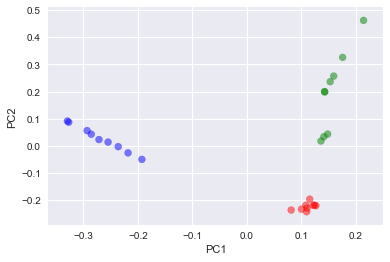

In [109]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(np.transpose(exp_df))
X_std
u,s,v = np.linalg.svd(np.transpose(X_std))  
x=v[0,:]
y=v[1,:]
print(len(x))
plt.scatter(x, y, alpha=0.5,marker='o',c=read_counts_df['Color'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc=2)
plt.show()
### 
#mean_vec = np.mean(X_std, axis=0)
#cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
#print('Covariance matrix \n%s' %cov_mat)

27


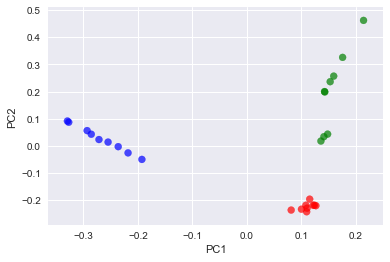

In [115]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(np.transpose(exp_df))
X_std.shape
u,s,v = np.linalg.svd(X_std.T)  
x=v[0,:]
y=v[1,:]
print(len(x))
plt.scatter(x, y, alpha=0.7,marker='o',c=read_counts_df['Color'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc=2)
plt.show()


In [90]:
#print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))
#cov_mat = np.cov(X_std.T)
#eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

<bound method PCA.score of PCA(copy=True, n_components=2, whiten=False)>
27


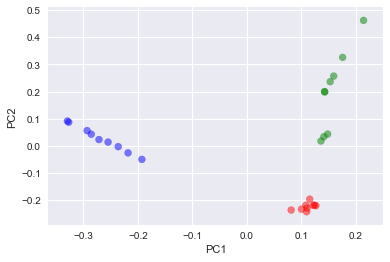

In [89]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(np.transpose(exp_df))
X_std
u,s,v = np.linalg.svd(np.transpose(X_std))  
x=v[0,:]
y=v[1,:]
print(len(x))
plt.scatter(x, y, alpha=0.5,marker='o',c=read_counts_df['Color'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc=2)
plt.show()
### 
#mean_vec = np.mean(X_std, axis=0)
#cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
#print('Covariance matrix \n%s' %cov_mat)
